In [4]:
'''Importing basic data analysis packages'''
import numpy as np
import pandas as pd
import csv
import warnings
import os
import time
import math
warnings.filterwarnings('ignore')
#os.getcwd()

'''Plotting packages'''
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)

In [2]:
cd "/Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning"

/Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning


In [6]:
###########################
# Pledge 1% Company UUIDs #
###########################
print('*'*100)

p1 = pd.read_csv('files/p1.csv')
print('PLEDGE 1% cols: {}\nSHAPE: {}\n'.format(p1.columns.to_list(), p1.shape))

#################
# Organizations #
#################
print('*'*100)

org = pd.read_csv('files/csv/organizations.csv')
print('ORGANIZATION cols: {}\nSHAPE: {}\n'.format(org.columns.to_list(), org.shape))

#org_dscrp = pd.read_csv('files/csv/organization_descriptions.csv')
#print('ORGANIZATION DESCRIPTION cols: {}\nSHAPE: {}\n'.format(org_dscrp.columns.to_list(), org_dscrp.shape))

##########
# People #
##########
print('*'*100)

ppl = pd.read_csv('files/csv/people.csv')
print('PEOPLE cols: {}\nSHAPE: {}\n'.format(ppl.columns.to_list(), ppl.shape))

#ppl_dscrp = pd.read_csv('files/csv/people_descriptions.csv')
#print('PEOPLE DESCRIPTION cols: {}\nSHAPE: {}\n'.format(ppl_dscrp.columns.to_list(), ppl_dscrp.shape))

#############
# Financial #
#############
print('*'*100)

#invstr = pd.read_csv('files/csv/investors.csv')
#print('INVESTOR cols: {}\nSHAPE: {}\n'.format(invstr.columns.to_list(), invstr.shape))

invest = pd.read_csv('files/csv/investments.csv')
print('INVESTMENTS cols: {}\nSHAPE: {}\n'.format(invest.columns.to_list(), invest.shape))

invest_prtnr = pd.read_csv('files/csv/investment_partners.csv')
print('PARTNER INVESTMENTS cols: {}\nSHAPE: {}\n'.format(invest_prtnr.columns.to_list(), invest_prtnr.shape))

funds = pd.read_csv('files/csv/funds.csv')
print('FUNDS cols: {}\nSHAPE: {}\n'.format(funds.columns.to_list(), funds.shape))

fund_rnds = pd.read_csv('files/csv/funding_rounds.csv')
print('FUNDING ROUNDS cols: {}\nSHAPE: {}\n'.format(fund_rnds.columns.to_list(), fund_rnds.shape))

########
# Jobs #
########
print('*'*100)

jobs = pd.read_csv('files/csv/jobs.csv') # All jobs affiliated with company
print('JOBS cols: {}\nSHAPE: {}'.format(jobs.columns.to_list(), jobs.shape))

****************************************************************************************************
PLEDGE 1% cols: ['uuid', 'p1_tag', 'p1_date']
SHAPE: (7822, 3)

****************************************************************************************************
ORGANIZATION cols: ['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at', 'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url', 'country_code', 'state_code', 'region', 'city', 'address', 'postal_code', 'status', 'short_description', 'category_list', 'category_groups_list', 'num_funding_rounds', 'total_funding_usd', 'total_funding', 'total_funding_currency_code', 'founded_on', 'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone', 'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url', 'alias1', 'alias2', 'alias3', 'primary_role', 'num_exits']
SHAPE: (1131310, 41)

****************************************************************************************************
PEOPLE cols: ['uuid', 

In [7]:
ipos = pd.read_csv('files/csv/ipos.csv')
print('IPOs cols: {}\nSHAPE: {}\n'.format(ipos.columns.to_list(), ipos.shape))

IPOs cols: ['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at', 'updated_at', 'org_uuid', 'org_name', 'org_cb_url', 'country_code', 'state_code', 'region', 'city', 'stock_exchange_symbol', 'stock_symbol', 'went_public_on', 'share_price_usd', 'share_price', 'share_price_currency_code', 'valuation_price_usd', 'valuation_price', 'valuation_price_currency_code', 'money_raised_usd', 'money_raised', 'money_raised_currency_code']
SHAPE: (33757, 27)



In [6]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [7]:
# Merge p1 and org dataframes on the organization uuid
df = pd.merge(org.copy(),p1.copy(),how='outer',on='uuid')

# Convert Boolean to binary
df['p1_tag'] = df['p1_tag'].apply(lambda x: 1 if x == True else 0)
p1['p1_tag'] = 1

# Convert employee_count 'unknown' to NaN to get accurate missing value count
df['employee_count'] = df['employee_count'].apply(lambda x: np.NaN if x == 'unknown' else x)

# Review Pandas Profiling Report of dataframe & update columns
df = df[['uuid','name','rank','status','employee_count','total_funding_usd','num_funding_rounds','primary_role','region','country_code','category_list','category_groups_list','founded_on','created_at','updated_at','p1_date','p1_tag']]

##############
# Timestamps #
##############

# Convert to datetime objects
df['p1_date'] = pd.to_datetime(df['p1_date'])
p1['p1_date'] = pd.to_datetime(p1['p1_date'])

# Get OutOfBoundsDatetime error if do not coerce for CB native timestamp columns
df['created_at'] = pd.to_datetime(df['created_at'],errors='coerce').dt.strftime('%Y-%m-%d')
df['updated_at'] = pd.to_datetime(df['updated_at'],errors='coerce').dt.strftime('%Y-%m-%d')
df['founded_on'] = pd.to_datetime(df['founded_on'],errors='coerce')

# Reduce storage for numerical features
df = reduce_mem_usage(df)

# Create new pledge1 dataframe that sorts by chronological order that the company took the pledge
pledge1 = df[df['p1_tag'] == 1].sort_values('p1_date')

Mem. usage decreased to 132.71 Mb (14.6% reduction)


<h2> Is there a difference in investments between investors and companies? </h2>

In [29]:
investor_df = df[df['primary_role'] == 'investor']
company_df = df[df['primary_role'] == 'company']
print(f"The number of investors in the dataset is: {len(investor_df)}")
print(f"The number of companies in the dataset is: {len(company_df)}")

invested_investors = df[df['p1_tag'].notna()]
invested_companies = df[df['p1_tag'].notna()]
print(f"The percentage of investors who have joined pledge1% is {round((len(invested_investors)/len(investor_df)),3)}")
print(f"The percentage of companies who have joined pledge1% is {round((len(invested_companies)/len(company_df)),3)}")

print("This may show that companies whose primary purpose is to invest are more likely to join pledge 1% than the remaining companies.")

The number of investors in the dataset is: 52435
The number of companies in the dataset is: 1065201
The percentage of investors who have joined pledge1% is 21.576
The percentage of companies who have joined pledge1% is 1.062
This may show that companies whose primary purpose is to invest are more likely to join pledge 1% than the remaining companies.


In [59]:
print("From the charts below, we can see that Financial Services in general as well as Financial Services for lending/investments are the most common donors. We can normalize these by looking at the total number of companies that fit within these categories.")

From the charts below, we can see that Financial Services in general as well as Financial Services for lending/investments are the most common donors. We can normalize these by looking at the total number of companies that fit within these categories.


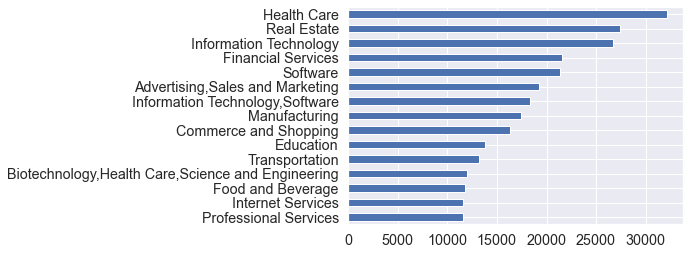

In [66]:
company_df['category_groups_list'].value_counts().head(15).plot(kind = 'barh').invert_yaxis()

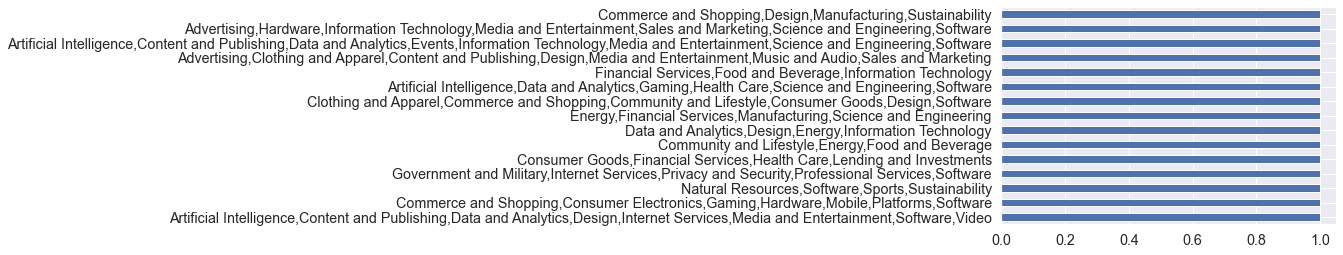

In [92]:
company_counts = company_df['category_groups_list'].value_counts()
total_counts = df['category_groups_list'].value_counts()
proportions = {}

for i in company_counts.index:
    proportions[i] = company_counts.get(i)/total_counts.get(i)

ser = pd.Series(proportions) 
ser.sort_values(ascending = False).head(15).plot(kind='barh')
#ser.head(15).plot(kind='barh').invert_yaxis()

In [93]:
print("In this case, normalizing doesn't actaully help since there are so many different categories. The percentages in the plot are artificially high.")

In this case, normalizing doesn't actaully help since there are so many different categories. The percentages in the plot are artificially high.


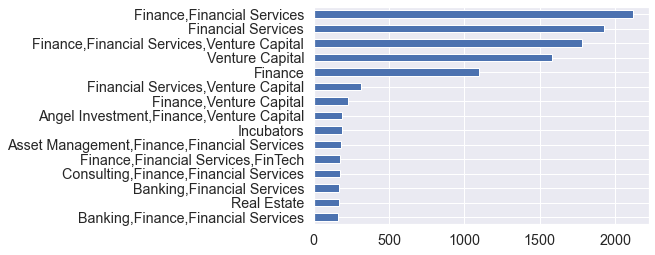

In [94]:
investor_df['category_list'].value_counts().head(15).plot(kind='barh').invert_yaxis()

In [95]:
print("For investors, we can see that the group financial services - Finance and general financial services are the most common groups to invest.") 
      

For investors, we can see that the group financial services - Finance and general financial services are the most common groups to invest.


<h2>Adding a date field</h2>

In [107]:
from datetime import datetime

In [184]:
now = datetime.now().date()
df['founded_on2'] = pd.to_datetime(df['founded_on']).dt.date
df['founded_on2'].fillna(now, inplace = True)

age = []
for i in range (len(df['founded_on'])):
    age.append(round(((now - df['founded_on2'][i]).days)/365,3))
    
age_series = pd.Series(age)
df['age'] = age_series

In [200]:
print(f"There are {df['age'].value_counts().get(0)} entries with no founded_on date. Let's remove these from the dataset.")
df['age'].replace(0, None, inplace=True)
print(f"Now there are {df['age'].value_counts().get(0)} with the value of 0.")

There are 252682 entries with no founded_on date. Let's remove these from the dataset.
Now there are None with the value of 0.


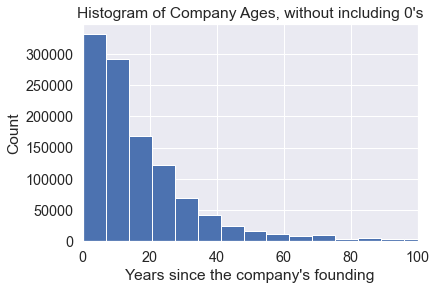

In [205]:
plt.hist(df['age'], bins = 50)
plt.xlabel("Years since the company's founding")
plt.ylabel("Count")
plt.title("Histogram of Company Ages, without including 0's")
plt.xlim(0,100)
plt.show()

In [211]:
#Creating a second dataframe with only Pledge1 sponsors
df2 = df[df['p1_tag']==1]

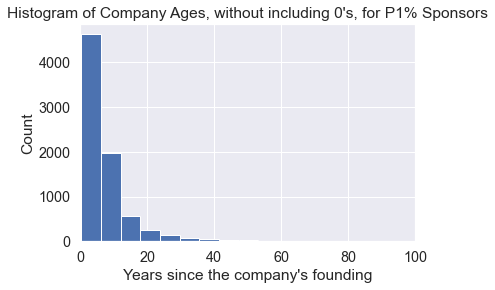

This chart shows that P1% Sponsors tend to be younger than the full datasets companies.


In [215]:
plt.hist(df2['age'], bins = 50)
plt.xlabel("Years since the company's founding")
plt.ylabel("Count")
plt.title("Histogram of Company Ages, without including 0's, for P1% Sponsors")
plt.xlim(0,100)
plt.show()

print("This chart shows that P1% Sponsors tend to have a younger distribution than the full datasets companies.")

<h2> Model on when the companies went public </h2>

In [62]:
#First merging in IPOs, then merging in organizations
df2 = pd.merge(ipos.copy(),p1.copy(),how='outer',on='uuid')
df3 = pd.merge(org.copy(),df2.copy(), how='outer',on='uuid')

In [63]:
#Cleaning up the data so that we can use the "went public on" column as the labeled data
df3['p1_tag'] = df3['p1_tag'].fillna(0)
df3.loc[df3.went_public_on.notnull(), "went_public_on"] = 1
df3['went_public_on'] = df3['went_public_on'].fillna(0)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train, test = train_test_split(df3, test_size=0.25)

In [65]:
train_reshaped =[]
for data_point in train['went_public_on']:
    train_reshaped.append([data_point])

train_labels_reshaped=[]
for data_point_2 in train['p1_tag']:
    train_labels_reshaped.append([data_point_2])
    
test_reshaped =[]
for data_point_3 in test['went_public_on']:
    test_reshaped.append([data_point_3])

test_labels_reshaped=[]
for data_point_4 in test['p1_tag']:
    test_labels_reshaped.append([data_point_4])

In [134]:
reg = LinearRegression().fit(train_reshaped, train_labels_reshaped)
reg.score(train_reshaped, train_labels_reshaped)

0.0002042729389377662

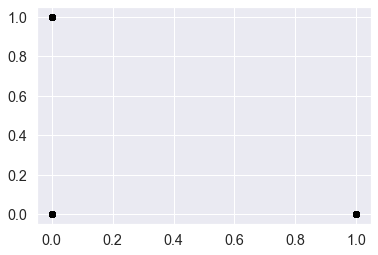

In [136]:
plt.plot(train['went_public_on'], train['p1_tag'], 'o', color='black');

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_reshaped,train_labels_reshaped)
print("The accuracy is " + str(knn.score(test_reshaped, test_labels_reshaped) ))

The accuracy is 0.9932227364489061


<h2>Model on share price</h2>

In [36]:
#Setting up data
df2['share_price_usd'] = df2['share_price_usd'].dropna()
df2['p1_tag'] = df2['p1_tag'].fillna(0)

train, test = train_test_split(df2, test_size=0.25)

In [37]:
train_reshaped =[]
for data_point in train['share_price_usd']:
    train_reshaped.append([data_point])

train_labels_reshaped=[]
for data_point_2 in train['p1_tag']:
    train_labels_reshaped.append([data_point_2])
    
test_reshaped =[]
for data_point_3 in test['share_price_usd']:
    test_reshaped.append([data_point_3])

test_labels_reshaped=[]
for data_point_4 in test['p1_tag']:
    test_labels_reshaped.append([data_point_4])

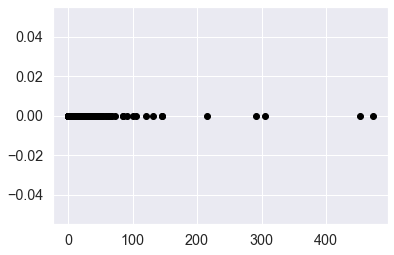

In [38]:
plt.plot(train_reshaped, train_labels_reshaped, 'o', color='black');

<h2>Model on Region</h2>

In [53]:
#Setting up data
df5=df2.copy()
df5['state_code']=df2['state_code'].dropna()
df5['p1_tag'] = df5['p1_tag'].fillna(0)

train, test = train_test_split(df2, test_size=0.25)

In [54]:
train_reshaped =[]
for data_point in train['state_code']:
    train_reshaped.append([data_point])

train_labels_reshaped=[]
for data_point_2 in train['p1_tag']:
    train_labels_reshaped.append([data_point_2])
    
test_reshaped =[]
for data_point_3 in test['state_code']:
    test_reshaped.append([data_point_3])

test_labels_reshaped=[]
for data_point_4 in test['p1_tag']:
    test_labels_reshaped.append([data_point_4])

In [4]:
from sklearn.linear_model import LogisticRegression

#reg = LogisticRegression().fit(train_reshaped, train_labels_reshaped)
#reg.score(test_reshaped, test_labels_reshaped)